<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#99FFFF;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:9px 9px;">TELCO CHURN PREDICTION | FEATURE ENGINEERING-EDA & MODELING</p> 

![](https://miro.medium.com/max/844/1*MyKDLRda6yHGR_8kgVvckg.png)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#99FFFF;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:9px 9px;">INFORMATION ABOUT DATASETS AND VARIABLES</p>  

<div style="border-radius:10px;
            border : black solid;
            background-color: #FFFFF;
            font-size:110%;
            text-align: left">
    
In this notebook, we will develop a machine learning model that can predict customers who will leave the company.

Before modelling , we will make the exploratory data analysis and feature engineering for its dataset.

Descriptions of Variables:

* ****CustomerID**** : Client ID
* ****Gender**** : Client Sexuality
* ****SeniorCitizen**** : Whether the client is old (1:Yes, 0:No)
* ****Partner**** : Whether the client has a partner (Yes,No)
* ****Dependents****: Whether the client has dependents(Yes,No)
* ****tenure**** : The number of months that the client has stayed with the company
* ****PhoneService****: Whether the client has phone service(Yes or No)
* ****MultipleLines**** : Whether the client has multiple lines(Yes,No,No phone service)
* ****InternetService****: Whether the client has internet service(Yes, No, No internet service)
* ****OnlineSecurity**** : Whether the client has online security(Yes, No, No internet service)
* ****OnlineBackup**** : Whether the client has online backup(Yes, No, No internet service)
* ****DeviceProtection****: Whether the client has device protection(Yes, No, No internet service)
* ****TechSupport****: Whether the client has device protection(Yes, No, No internet service)
* ****StreamingTV****:Whether the client has streaming TV channel (Yes, No, No internet service)
* ****StreamingMovies**** :Whether the client has  streaming Movies channel(Yes, No, No internet service)
* ****Contract****: Client's contract duration(month-to-month,one year,two years) 
* ****PaperlessBiling****: Whether client has paperless invoice(Yes, No)
* ****PaymentMethod**** : The client payment method(Electronic check, mail, bank transfer(automatic),credit card(automatic)
* ****MonthlyCharges****: Monthly amount received from the client
* ****TotalCharges****: Yearly amount received from the client
* ****Churn**** : 


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#99FFFF;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:9px 9px;">TABLE OF CONTENTS</p>  
    
##### [1.Data Preprocessing](#data_preprocessing)
* [Importing Libraries](#importing_libraries)<br>
* [Reading in a dataset](#reading_in_a_dataset)<br>
* [Exploratory Data Analysis](#exploratory_data_analysis)<br>

##### [2.Feature Engineering](#develop_the_association_rule_learning)
* [Processing for Missing Values and Outliers](#processing_for_missing_values_and_outliers)
* [Creating New Feature Interactions](#creating_new_feature_interactions)

##### [3.Modeling](#modeling)
* [Processing Encoding & One-Hot Encoding](#processing_encoding_and_one_hot-encoding)
* [Standardization for Numerical Variables](#standardization_for_numerical_variables)
* [Create Modeling](#create_modeling)

##### [4.Summary](#summary)

##                           1.DATA PREPROCESSING                                     #
<a id="data_preprocessing"></a>

#### **1.1.Importing Libraries**
<a id="importing_libraries"></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


#### **1.2.Read the dataset**
<a id="read_the_dataset"></a>

In [ ]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **1.3.Exploratory Data Analysis**
<a id="exploratory_data_analysis"></a>

In [ ]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-n

##### 1.3.2.Define a Function to grab the Numerical and Categorical variables of its dataset

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.
    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri
    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [ ]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [ ]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

##### 1.3.3.Target Variable Analysis

In [ ]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df["Churn"] = df["Churn"].map({'No':0,'Yes':1})


In [ ]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

##### Target Summary with Categorical variables

In [ ]:
def target_summary_with_cat(dataframe,target,categorical_col):
    print(pd.DataFrame({"CHURN_MEAN": dataframe.groupby(categorical_col)[target].mean()}))
    print("*20")

for col in cat_cols:
    target_summary_with_cat(df,"Churn",col)

        CHURN_MEAN
gender            
Female    0.269209
Male      0.261603
*20
         CHURN_MEAN
Partner            
No         0.329580
Yes        0.196649
*20
            CHURN_MEAN
Dependents            
No            0.312791
Yes           0.154502
*20
              CHURN_MEAN
PhoneService            
No              0.249267
Yes             0.267096
*20
                  CHURN_MEAN
MultipleLines               
No                  0.250442
No phone service    0.249267
Yes                 0.286099
*20
                 CHURN_MEAN
InternetService            
DSL                0.189591
Fiber optic        0.418928
No                 0.074050
*20
                     CHURN_MEAN
OnlineSecurity                 
No                     0.417667
No internet service    0.074050
Yes                    0.146112
*20
                     CHURN_MEAN
OnlineBackup                   
No                     0.399288
No internet service    0.074050
Yes                    0.215315
*20
               

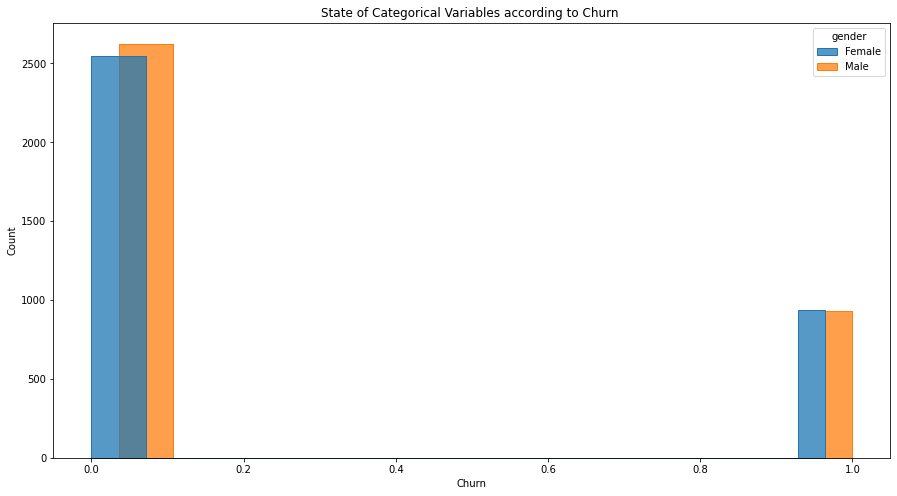

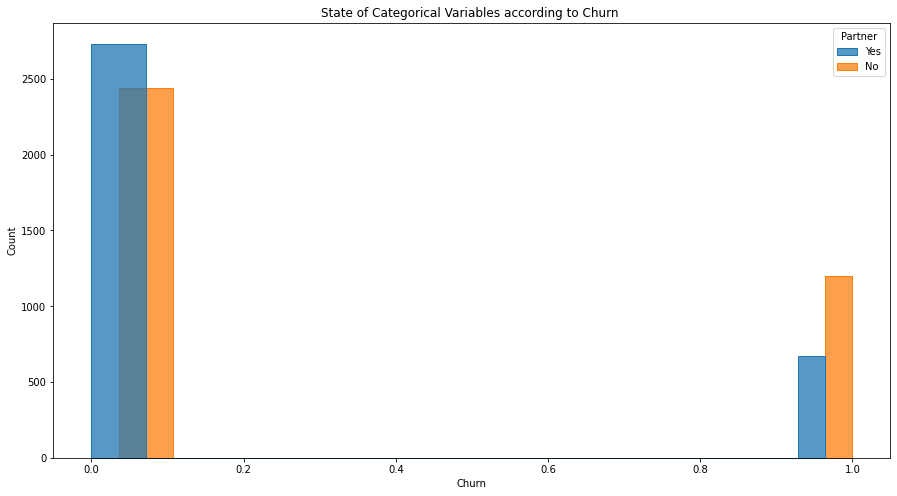

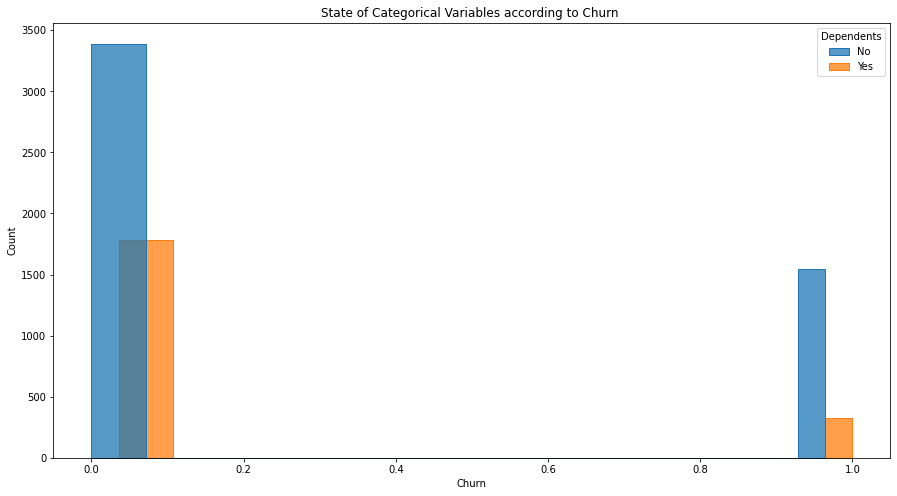

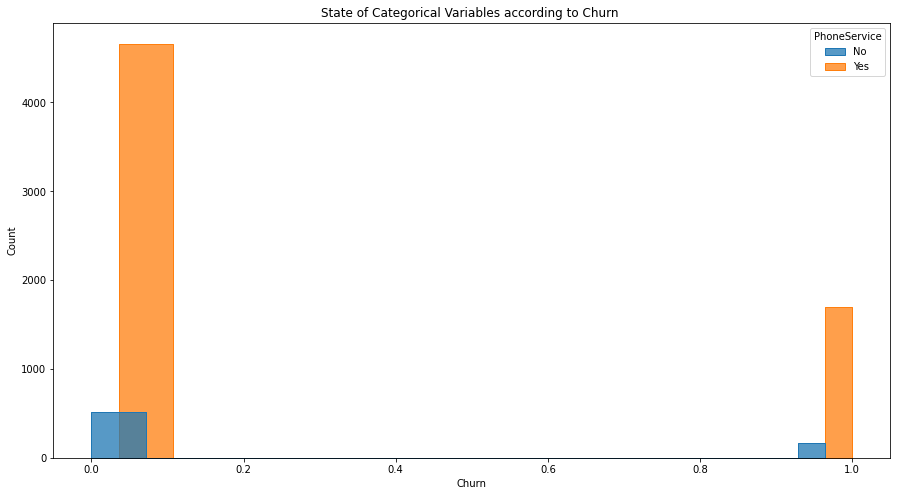

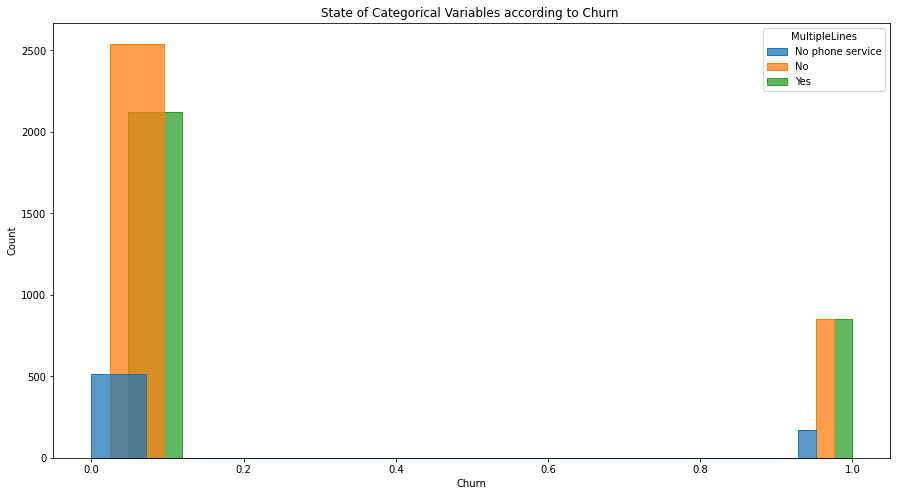

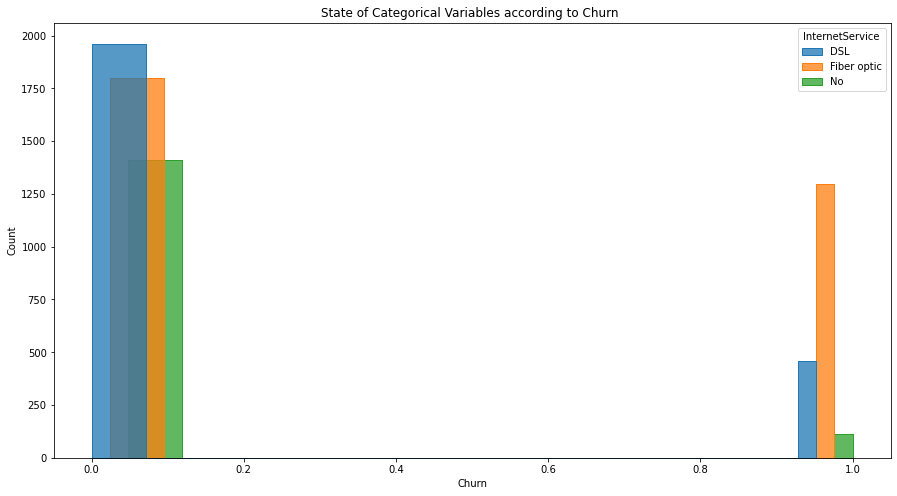

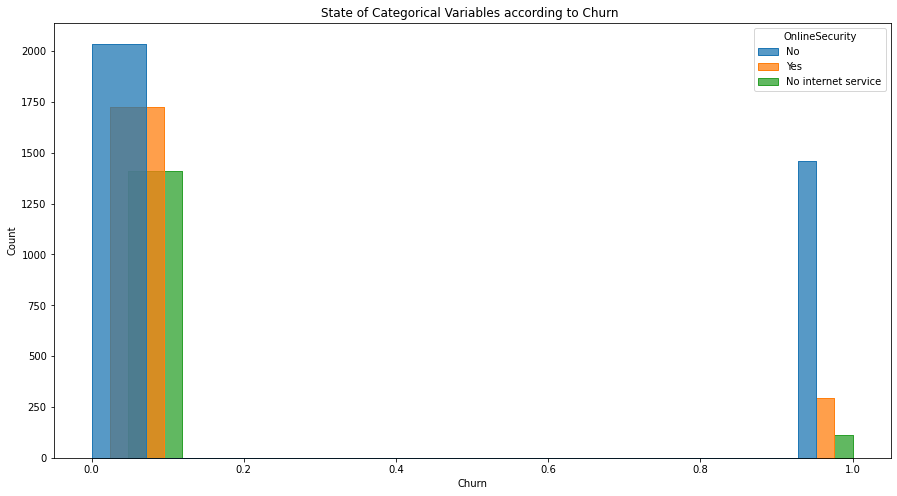

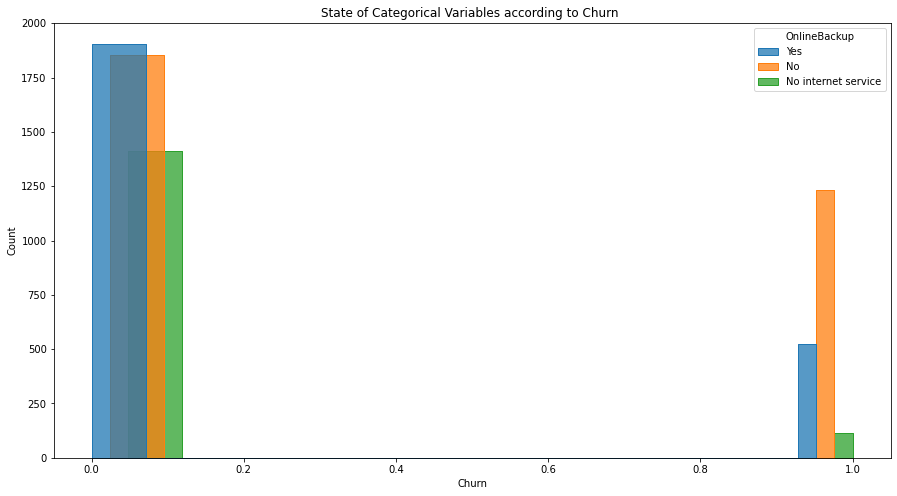

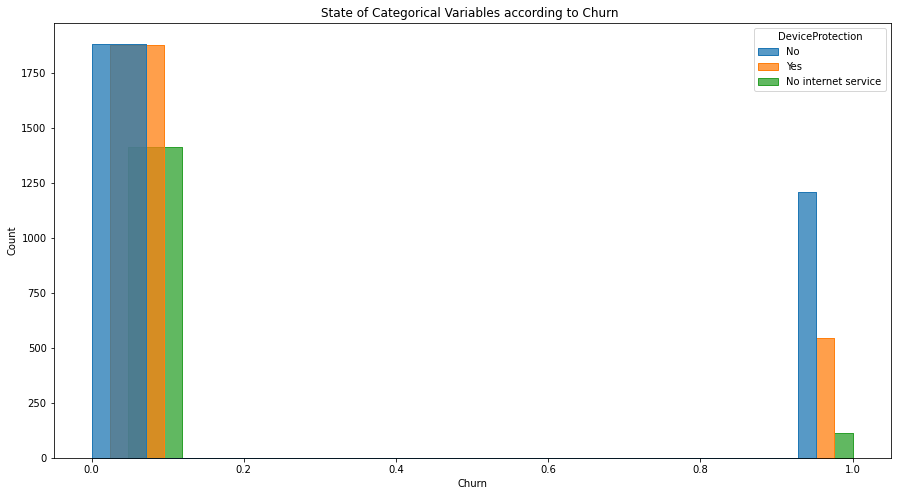

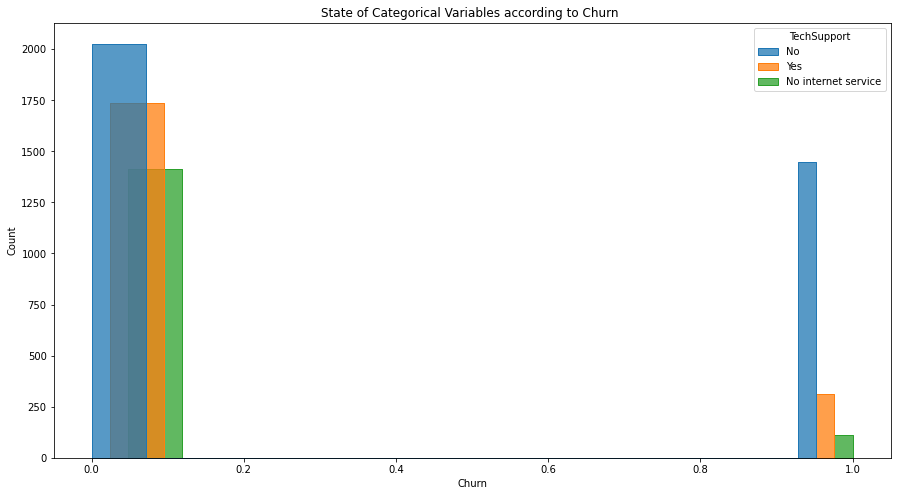

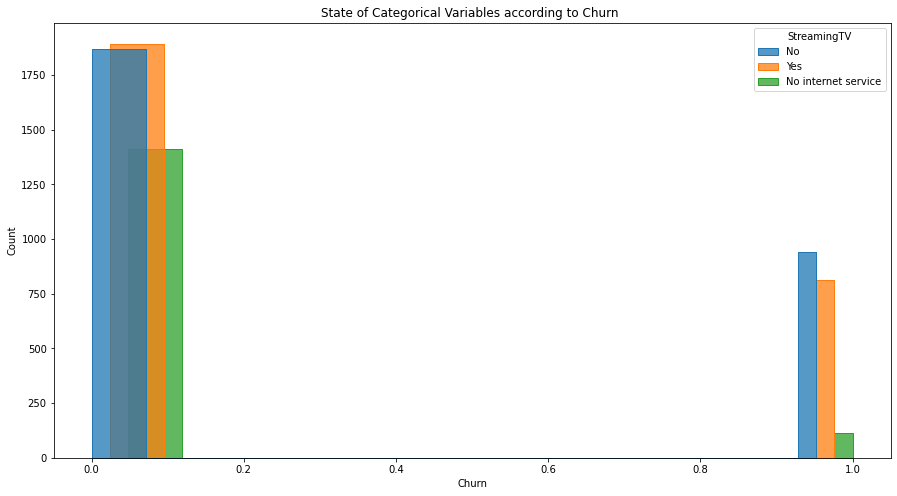

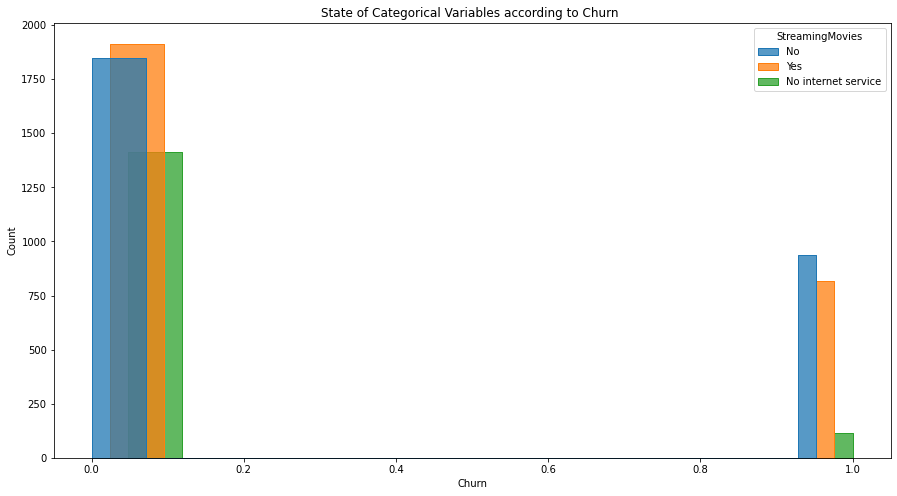

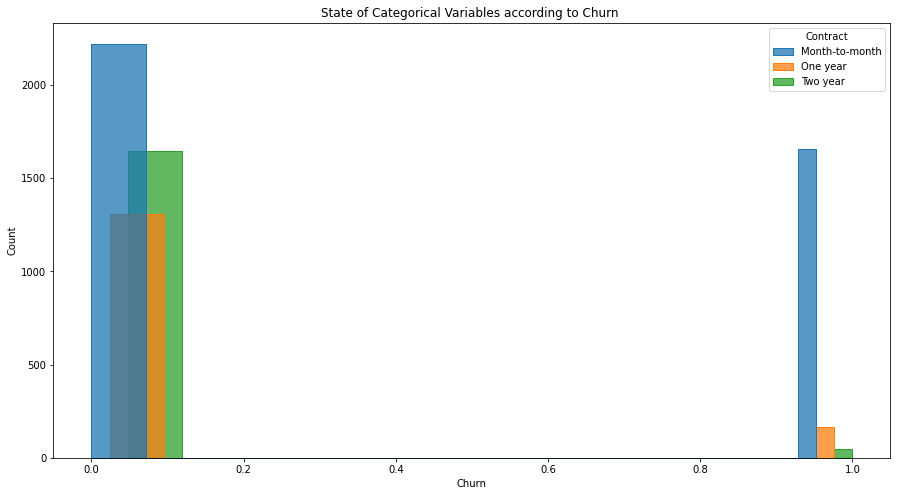

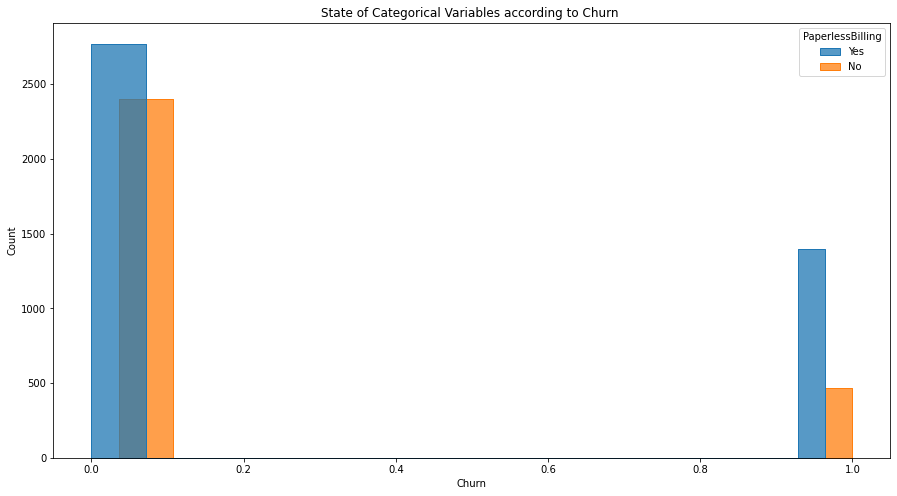

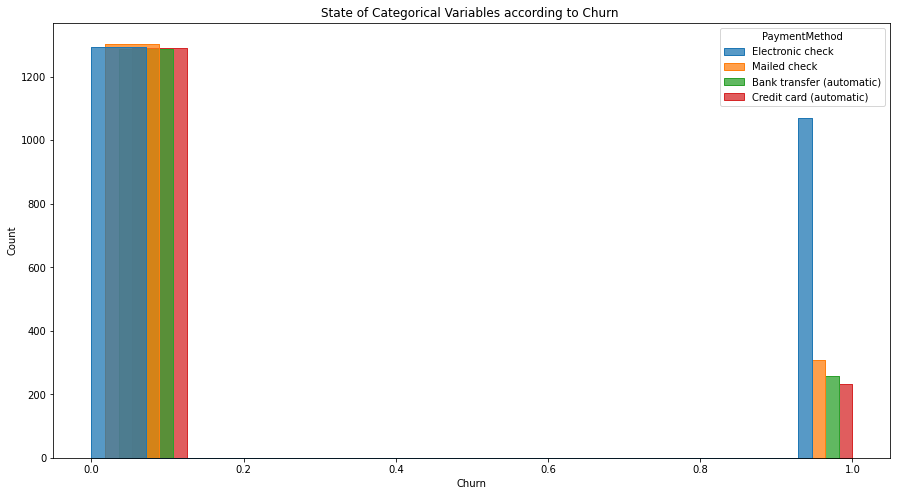

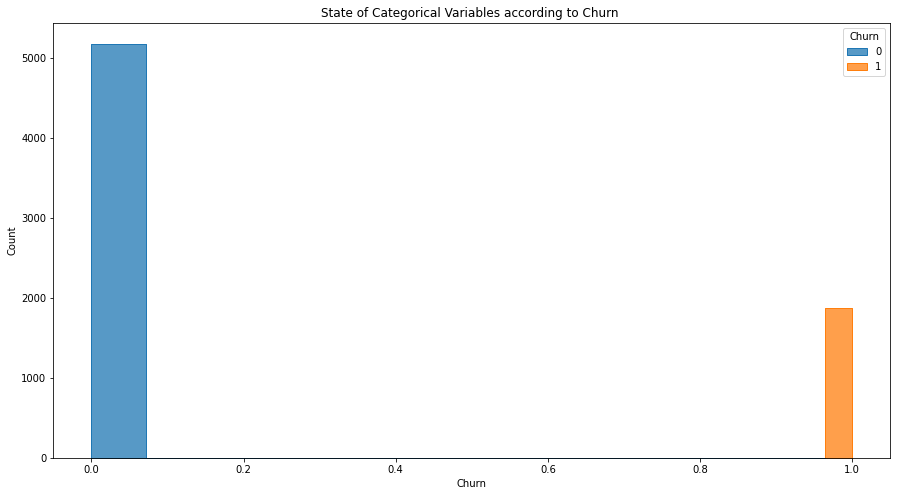

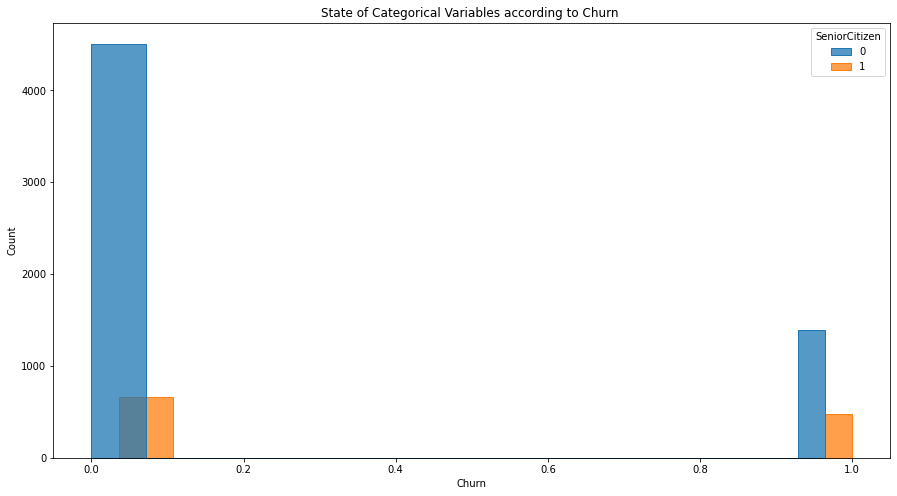

In [ ]:
def target_vs_category_visual(dataframe,target, categorical_col):
    plt.figure(figsize=(15,8))
    sns.histplot(x=target,hue=categorical_col, data=dataframe,element="step",multiple="dodge")
    plt.title("State of Categorical Variables according to Churn ")
    plt.show()

for col in cat_cols:
    target_vs_category_visual(df,"Churn",col)

#### Conclusion

My interpretation of the categorical variables in line with the graphs is as follows:
* There is no significant difference in the churn numbers of male and female customers.
* It seems that clients who pay by electronic check have a high churn.
* It seems that clients with monthly contracts have a high churn.
* It seems that clients using fiber optic internet have a high churn.


These comments were made according to the graphics. A/B testing can be done to verify these.

##### Target Summary with Numerical variables


In [ ]:
def target_summary_with_num(dataframe,target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n")
    print("###################################")
    

for col in num_cols:
    target_summary_with_num(df,"Churn",col)

          tenure
Churn           
0      37.569965
1      17.979133

###################################
       MonthlyCharges
Churn                
0           61.265124
1           74.441332

###################################
       TotalCharges
Churn              
0       2555.344141
1       1531.796094

###################################


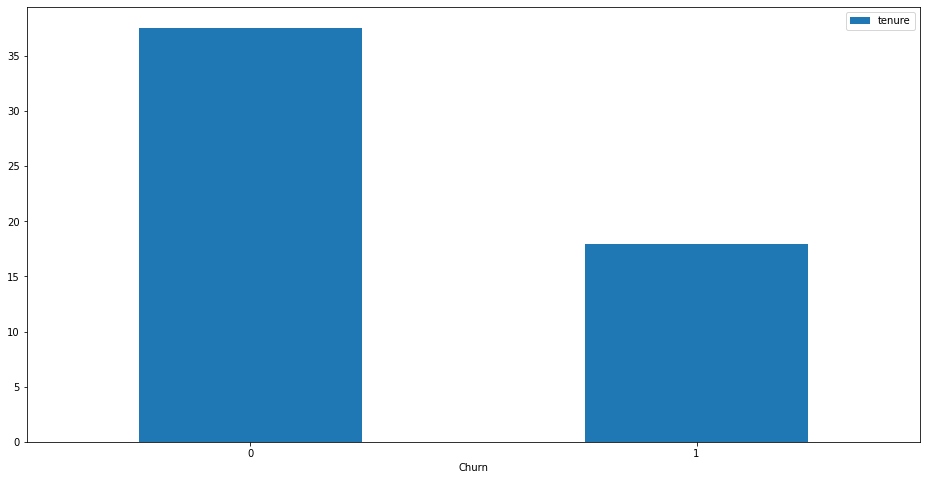

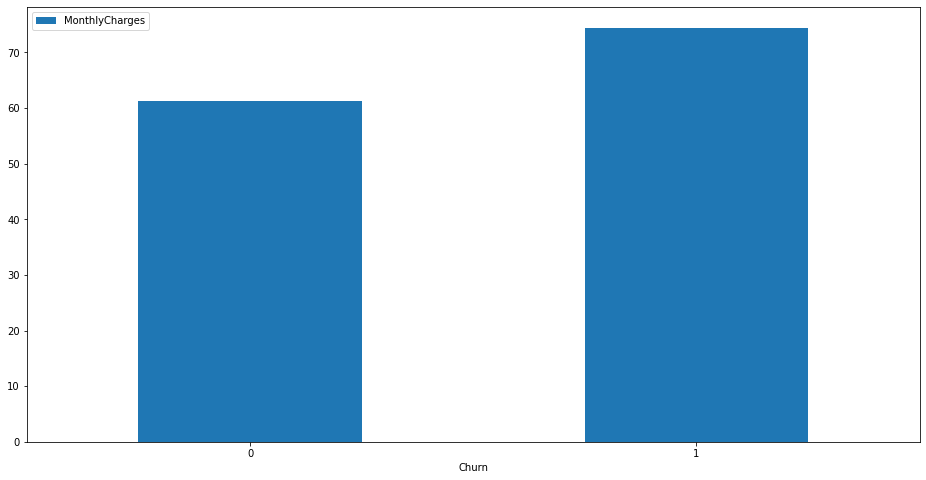

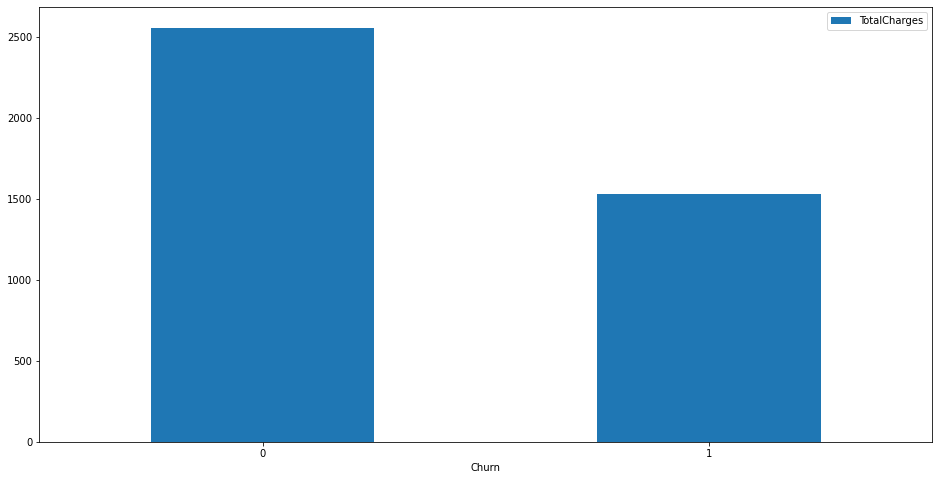

In [ ]:
for col in num_cols:
    df.groupby('Churn').agg({col:'mean'}).plot(kind='bar', rot = 0,figsize=(16,8))

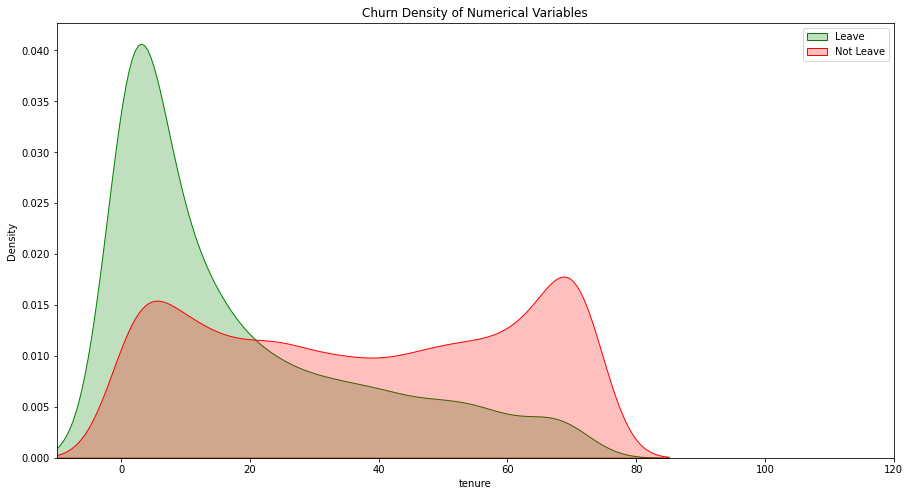

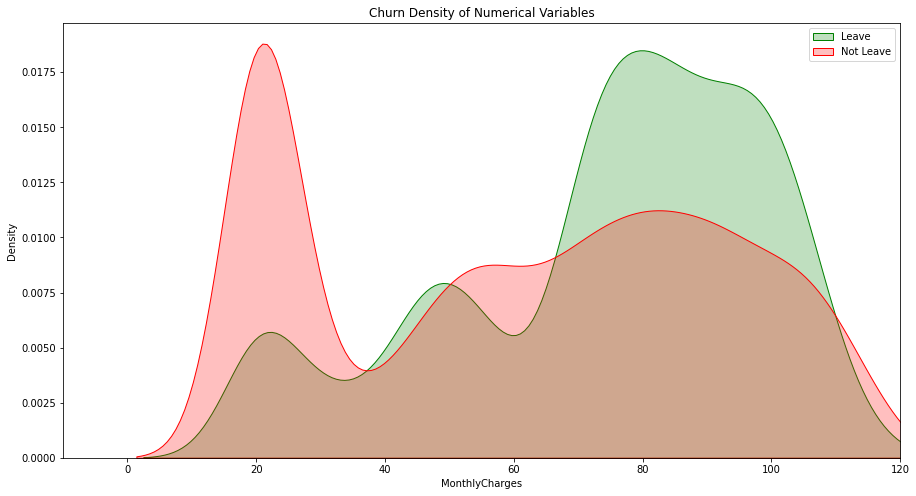

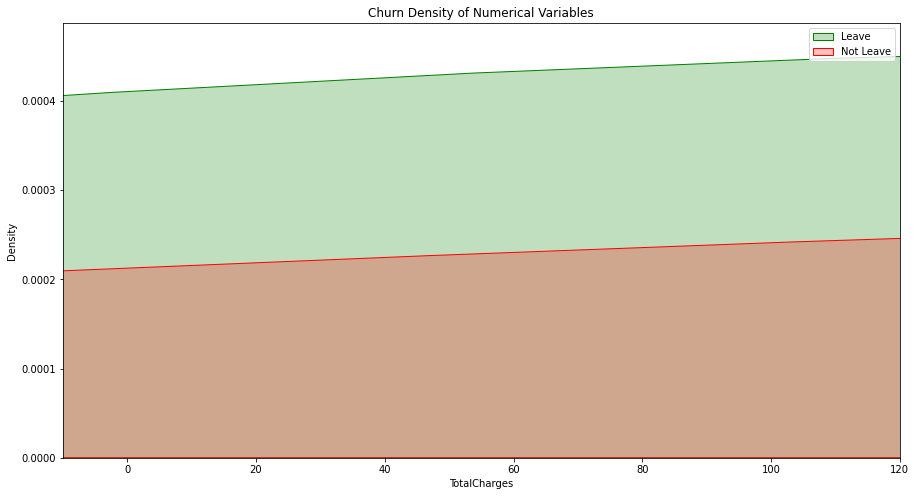

In [ ]:
def target_density_est_with_num(dataframe,target, numerical_col):
    plt.figure(figsize=(15,8))
    ax = sns.kdeplot(df[col][df.Churn == 1], color="green", shade=True)
    sns.kdeplot(df[col][df.Churn == 0], color="red", shade=True)
    plt.legend(['Leave', 'Not Leave'])
    plt.xlim(-10,120)
    plt.title("Churn Density of Numerical Variables")
    plt.show()
    
for col in num_cols:
    target_density_est_with_num(df,"Churn",col)

##### 1.3.4.Outliers Analysis

Define a Function about outlier threshold for data columns

In [ ]:
def outlier_th(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

Define a Function about checking outlier for data columns

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_th(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

Define a Function about replace with threshold for data columns


In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_th(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


In [ ]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [ ]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


##### 1.3.5.The Missing Values Analysis

Define a Function about missing values for dataset columns

In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)

              n_miss  ratio
TotalCharges      11   0.16


##### 1.3.6.Correlation Analysis

In [ ]:
corr_matrix = df[num_cols].corr()
corr_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


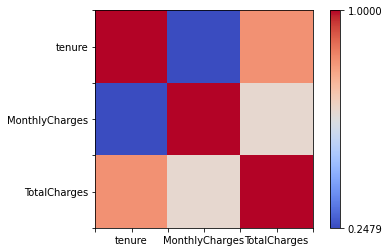

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)

# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in num_cols:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show()

<AxesSubplot:>

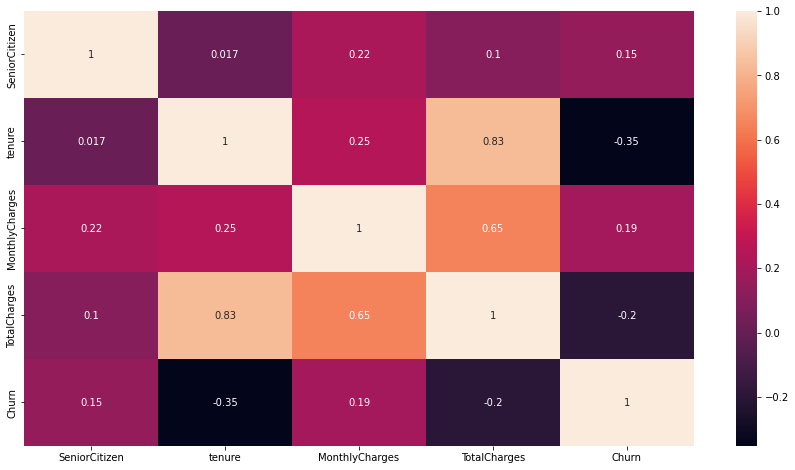

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)


##                           2.FEATURE ENGINEERING                                      #


#### **2.1.Processing for Missing Values**
<a id="processing_for_missing_values_and_outliers"></a>

In [ ]:
na_cols = missing_values_table(df, True)

              n_miss  ratio
TotalCharges      11   0.16


In [ ]:
df.dropna(inplace=True)

#### **2.2.Creating New Feature Interactions**
<a id="creating_new_feature_interactions"></a>

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
def cat_summary(dataframe,col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#########################################################################")

for col in cat_cols:
    cat_summary(df,col)

        gender      Ratio
Male      3549  50.469283
Female    3483  49.530717
#########################################################################
     Partner      Ratio
No      3639  51.749147
Yes     3393  48.250853
#########################################################################
     Dependents      Ratio
No         4933  70.150739
Yes        2099  29.849261
#########################################################################
     PhoneService     Ratio
Yes          6352  90.32992
No            680   9.67008
#########################################################################
                  MultipleLines      Ratio
No                         3385  48.137088
Yes                        2967  42.192833
No phone service            680   9.670080
#########################################################################
             InternetService      Ratio
Fiber optic             3096  44.027304
DSL                     2416  34.357224
No                     

In [ ]:
df["gender"] = df["gender"].map({'Male':0,'Female':1})

**Create a Senior/Young Man & Old/Young Woman Categorical variable**


In [ ]:
df.groupby("gender").agg({"Churn": ["mean","count"]})

Churn      
            mean count
gender                
0       0.262046  3549
1       0.269595  3483

In [ ]:
df.loc[((df['gender'] == 0) & (df["SeniorCitizen"]== 1)), 'SENIOR/YOUNG_GENDER'] ="senior_male"
df.loc[((df['gender'] == 0) & (df["SeniorCitizen"]== 0)), 'SENIOR/YOUNG_GENDER'] ="young_male"
df.loc[((df['gender'] == 1) & (df["SeniorCitizen"]== 1)), 'SENIOR/YOUNG_GENDER'] ="senior_female"
df.loc[((df['gender'] == 1) & (df["SeniorCitizen"]== 0)), 'SENIOR/YOUNG_GENDER'] ="young_female"

df.groupby("SENIOR/YOUNG_GENDER").agg({"Churn": ["mean","count"]})

Churn      
                         mean count
SENIOR/YOUNG_GENDER                
senior_female        0.422535   568
senior_male          0.411150   574
young_female         0.239794  2915
young_male           0.233277  2975

**Female/male customers using/not using telephone service**

In [ ]:
df.groupby("PhoneService").agg({"Churn": ["mean","count"]})

Churn      
                  mean count
PhoneService                
No            0.250000   680
Yes           0.267475  6352

In [ ]:
df.loc[((df['gender'] == 0) & (df["PhoneService"]== "Yes")), 'PHONE_SER_GENDER'] ="phone_ser_male"
df.loc[((df['gender'] == 0) & (df["PhoneService"]== "No")), 'PHONE_SER_GENDER'] ="no_phone_ser_male"
df.loc[((df['gender'] == 1) & (df["PhoneService"]== "Yes")), 'PHONE_SER_GENDER'] ="phone_service_female"
df.loc[((df['gender'] == 1) & (df["PhoneService"]== "No")), 'PHONE_SER_GENDER'] ="no_phone_ser_female"


df.groupby("PHONE_SER_GENDER").agg({"Churn": ["mean","count"]})

Churn      
                          mean count
PHONE_SER_GENDER                    
no_phone_ser_female   0.243161   329
no_phone_ser_male     0.256410   351
phone_ser_male        0.262664  3198
phone_service_female  0.272353  3154

In [ ]:
df.groupby("Dependents").agg({"Churn": ["mean","count"]})

Churn      
                mean count
Dependents                
No          0.312791  4933
Yes         0.155312  2099

In [ ]:
df.loc[((df['gender'] == 0) & (df["Dependents"]== "Yes")), 'DEPEND_GENDER'] ="dependent_male"
df.loc[((df['gender'] == 0) & (df["Dependents"]== "No")), 'DEPEND_GENDER'] ="undependent_male"
df.loc[((df['gender'] == 1) & (df["Dependents"]== "Yes")), 'DEPEND_GENDER'] ="dependent_female"
df.loc[((df['gender'] == 1) & (df["Dependents"]== "No")), 'DEPEND_GENDER'] ="undependent_female"

df.groupby("DEPEND_GENDER").agg({"Churn": ["mean","count"]})

Churn      
                        mean count
DEPEND_GENDER                     
dependent_female    0.161290  1023
dependent_male      0.149628  1076
undependent_female  0.314634  2460
undependent_male    0.310958  2473

In [ ]:
df.loc[((df['gender'] == 0) & (df["MultipleLines"]== "Yes")), 'PHONE_LINE_GENDER'] ="multiple_lines__male"
df.loc[((df['gender'] == 0) & (df["MultipleLines"]== "No")), 'PHONE_LINE_GENDER'] ="single_line__male"
df.loc[((df['gender'] == 0) & (df["MultipleLines"]== "No phone service")), 'PHONE_LINE_GENDER'] ="no_line__male"
df.loc[((df['gender'] == 1) & (df["MultipleLines"]== "Yes")), 'PHONE_LINE_GENDER'] ="multiple_lines__female"
df.loc[((df['gender'] == 1) & (df["MultipleLines"]== "No")), 'PHONE_LINE_GENDER'] ="single_line__female"
df.loc[((df['gender'] == 1) & (df["MultipleLines"]== "No phone service")), 'PHONE_LINE_GENDER'] ="no_line__female"

df.groupby("PHONE_LINE_GENDER").agg({"Churn": ["mean","count"]})

Churn      
                            mean count
PHONE_LINE_GENDER                     
multiple_lines__female  0.280135  1485
multiple_lines__male    0.292848  1482
no_line__female         0.243161   329
no_line__male           0.256410   351
single_line__female     0.265428  1669
single_line__male       0.236597  1716

In [ ]:
df.groupby("PaymentMethod").agg({"Churn": ["mean","count"]})

Churn      
                               mean count
PaymentMethod                            
Bank transfer (automatic)  0.167315  1542
Credit card (automatic)    0.152531  1521
Electronic check           0.452854  2365
Mailed check               0.192020  1604

In [ ]:
df.loc[((df['gender'] == 0) & (df["PaymentMethod"]== "Electronic check")), 'GENDER_PAYMENT'] ="male_electronic_check_pay"
df.loc[((df['gender'] == 1) & (df["PaymentMethod"]== "Electronic check")), 'GENDER_PAYMENT'] ="female_electronic_check_pay"


df.groupby("GENDER_PAYMENT").agg({"Churn": ["mean","count"]})

Churn      
                                 mean count
GENDER_PAYMENT                             
female_electronic_check_pay  0.446154  1170
male_electronic_check_pay    0.459414  1195

In [ ]:
df.groupby("Contract").agg({"Churn": ["mean","count"]})

Churn      
                    mean count
Contract                      
Month-to-month  0.427097  3875
One year        0.112772  1472
Two year        0.028487  1685

In [ ]:
df.loc[((df['gender'] == 0) & (df["Contract"]== "Month-to-month")), 'GENDER_CONTRACT'] ="male_monthly_contract"
df.loc[((df['gender'] == 1) & (df["Contract"]== "Month-to-month")), 'GENDER_CONTRACT'] ="female_monthly_contract"


df.groupby("GENDER_CONTRACT").agg({"Churn": ["mean","count"]})

Churn      
                             mean count
GENDER_CONTRACT                        
female_monthly_contract  0.437403  1925
male_monthly_contract    0.416923  1950

In [ ]:
df.groupby("InternetService").agg({"Churn": ["mean","count"]})

Churn      
                     mean count
InternetService                
DSL              0.189983  2416
Fiber optic      0.418928  3096
No               0.074342  1520

In [ ]:
df.loc[((df['SENIOR/YOUNG_GENDER'] == "senior_male") & (df["InternetService"]== "Fiber optic")), 'SEN_YNG_GENDER_FIBER'] ="senior_male_fiber_internet"
df.loc[((df['SENIOR/YOUNG_GENDER'] == "young_male") & (df["InternetService"]== "Fiber optic")), 'SEN_YNG_GENDER_FIBER'] ="young_male_fiber_internet"
df.loc[((df['SENIOR/YOUNG_GENDER'] == "senior_female") & (df["InternetService"]== "Fiber optic")), 'SEN_YNG_GENDER_FIBER'] ="senior_female_fiber_internet"
df.loc[((df['SENIOR/YOUNG_GENDER'] == "young_female") & (df["InternetService"]== "Fiber optic")), 'SEN_YNG_GENDER_FIBER'] ="young_female_fiber_internet"

df.groupby("SEN_YNG_GENDER_FIBER").agg({"Churn": ["mean","count"]})

Churn      
                                  mean count
SEN_YNG_GENDER_FIBER                        
senior_female_fiber_internet  0.469340   424
senior_male_fiber_internet    0.476658   407
young_female_fiber_internet   0.411869  1129
young_male_fiber_internet     0.386444  1136

In [ ]:
df.groupby("OnlineSecurity").agg({"Churn": ["mean","count"]})

Churn      
                         mean count
OnlineSecurity                     
No                   0.417787  3497
No internet service  0.074342  1520
Yes                  0.146402  2015

In [ ]:
df.loc[((df['gender'] == 0) & (df["InternetService"]== "Fiber optic") & ((df["OnlineSecurity"]== "No"))), 'INT_SEC_SERV_GENDER'] ="male_fiber_int_no_security"
df.loc[((df['gender'] == 1) & (df["InternetService"]== "Fiber optic") & ((df["OnlineSecurity"]== "No"))), 'INT_SEC_SERV_GENDER'] ="female_fiber_int_no_security"

df.groupby("INT_SEC_SERV_GENDER").agg({"Churn": ["mean","count"]})

Churn      
                                  mean count
INT_SEC_SERV_GENDER                         
female_fiber_int_no_security  0.500893  1120
male_fiber_int_no_security    0.486368  1137

In [ ]:
df.loc[((df['gender'] == 0) & (df["InternetService"]== "Fiber optic") & ((df["TechSupport"]== "No"))), 'INT_SEC_TECH_GENDER'] ="male_fiber_int_no_tech_sup"
df.loc[((df['gender'] == 1) & (df["InternetService"]== "Fiber optic") & ((df["TechSupport"]== "No"))), 'INT_SEC_TECH_GENDER'] ="female_fiber_int_no_tech_sup"

df.groupby("INT_SEC_TECH_GENDER").agg({"Churn": ["mean","count"]})

Churn      
                                  mean count
INT_SEC_TECH_GENDER                         
female_fiber_int_no_tech_sup  0.504050  1111
male_fiber_int_no_tech_sup    0.483467  1119

In [ ]:
df.loc[((df['gender'] == 0) & (df["Partner"]== "Yes")), 'PARTNER_GENDER'] ="with_partner_male"
df.loc[((df['gender'] == 0) & (df["Partner"]== "No")), 'PARTNER_GENDER'] ="without_partner_male"
df.loc[((df['gender'] == 1) & (df["Partner"]== "Yes")), 'PARTNER_GENDER'] ="with_partner_female"
df.loc[((df['gender'] == 1) & (df["Partner"]== "No")), 'PARTNER_GENDER'] ="without_partner_female"

df.groupby("PARTNER_GENDER").agg({"Churn": ["mean","count"]})

Churn      
                            mean count
PARTNER_GENDER                        
with_partner_female     0.189542  1683
with_partner_male       0.204678  1710
without_partner_female  0.344444  1800
without_partner_male    0.315389  1839

##                           3.MODELING                                     #


#### **3.1.Processing Encoding and One-Hot Encoding**
<a id="processing_encoding_and_one_hot-encoding"></a>

In [ ]:
le = LabelEncoder()

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


for col in binary_cols:
    df = label_encoder(df, col)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7032 non-null   object 
 1   gender                7032 non-null   int64  
 2   SeniorCitizen         7032 non-null   int64  
 3   Partner               7032 non-null   int64  
 4   Dependents            7032 non-null   int64  
 5   tenure                7032 non-null   float64
 6   PhoneService          7032 non-null   int64  
 7   MultipleLines         7032 non-null   object 
 8   InternetService       7032 non-null   object 
 9   OnlineSecurity        7032 non-null   object 
 10  OnlineBackup          7032 non-null   object 
 11  DeviceProtection      7032 non-null   object 
 12  TechSupport           7032 non-null   object 
 13  StreamingTV           7032 non-null   object 
 14  StreamingMovies       7032 non-null   object 
 15  Contract             

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 30 >= df[col].nunique() > 2]

In [ ]:
df = one_hot_encoder(df, ohe_cols)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,SEN_YNG_GENDER_FIBER_senior_male_fiber_internet,SEN_YNG_GENDER_FIBER_young_female_fiber_internet,SEN_YNG_GENDER_FIBER_young_male_fiber_internet,INT_SEC_SERV_GENDER_1,INT_SEC_SERV_GENDER_2,INT_SEC_TECH_GENDER_1,INT_SEC_TECH_GENDER_2,PARTNER_GENDER_with_partner_male,PARTNER_GENDER_without_partner_female,PARTNER_GENDER_without_partner_male
0,7590-VHVEG,1,0,1,0,1.0,0,1,29.85,29.85,...,0,0,0,0,1,0,1,0,0,0
1,5575-GNVDE,0,0,0,0,34.0,1,0,56.95,1889.50,...,0,0,0,0,1,0,1,0,0,1
2,3668-QPYBK,0,0,0,0,2.0,1,1,53.85,108.15,...,0,0,0,0,1,0,1,0,0,1
3,7795-CFOCW,0,0,0,0,45.0,0,0,42.30,1840.75,...,0,0,0,0,1,0,1,0,0,1
4,9237-HQITU,1,0,0,0,2.0,1,1,70.70,151.65,...,0,1,0,0,0,0,0,0,1,0


#### **3.2.Standardization for Numerical Variables**
<a id="standardization_for_numerical_variables"></a>

In [ ]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457


#### **3.3.Create Modeling**
<a id="create_modeling"></a>

In [ ]:
primitive_success=[]
model_names=[]
y=df['Churn']
X = df.drop(["customerID","Churn"], axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

def ML(algName):

    # Model Building / Training
    model=algName().fit(X_train,y_train)
    model_name=algName.__name__
    model_names.append(model_name)
    # Prediction
    y_pred=model.predict(X_test)
    # primitive-Success / Verification Score
    from sklearn.metrics import accuracy_score
    primitiveSuccess=accuracy_score(y_test,y_pred)
    primitive_success.append(primitiveSuccess)
    return  primitive_success,model_names,model

In [ ]:
models=[KNeighborsClassifier,SVC,MLPClassifier,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,XGBClassifier,LGBMClassifier]
for i in models:
    ML(i)


classification=pd.DataFrame( primitive_success,columns=
                                 ['accuracy_Score'],index=[model_names]).sort_values(by='accuracy_Score',ascending=False)
classification

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,accuracy_Score
GradientBoostingClassifier,0.807583
LGBMClassifier,0.804739
SVC,0.800948
RandomForestClassifier,0.785782
XGBClassifier,0.783886
MLPClassifier,0.774408
KNeighborsClassifier,0.771564
DecisionTreeClassifier,0.718957


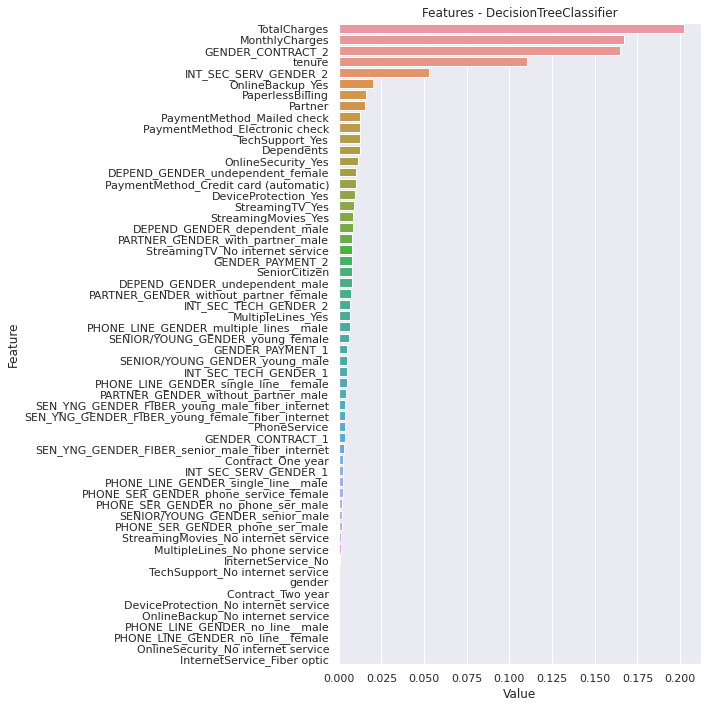

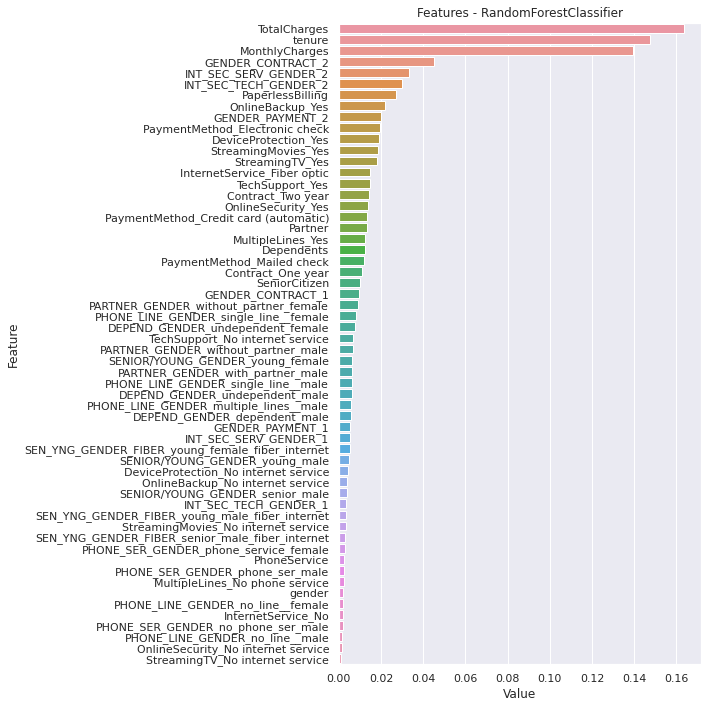

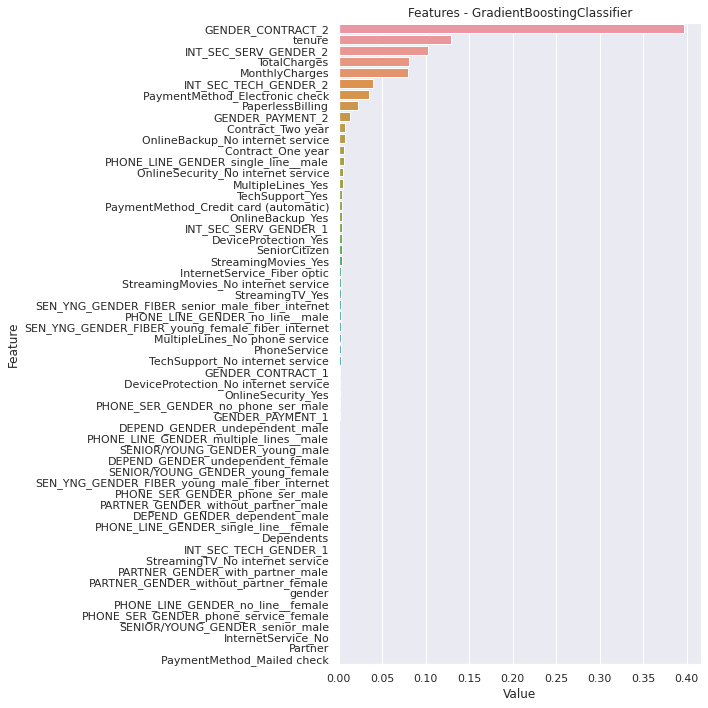

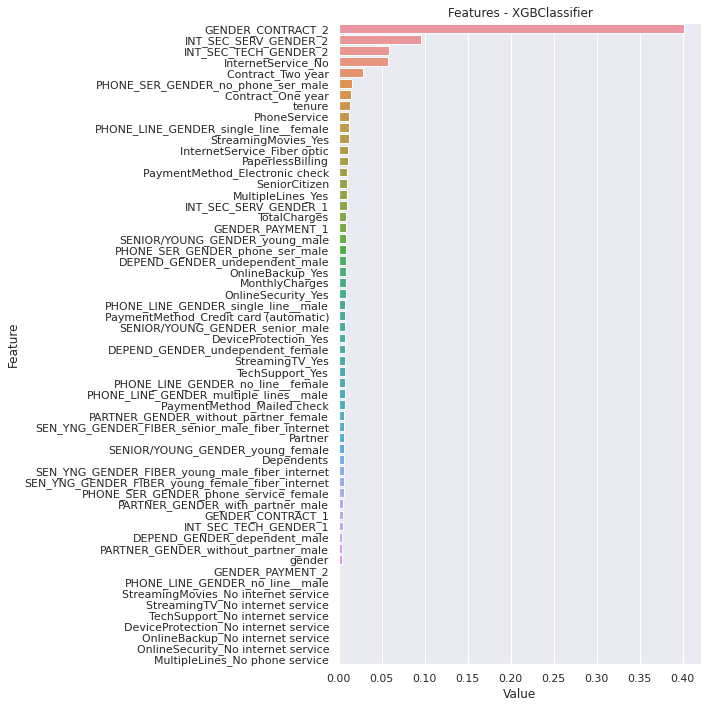

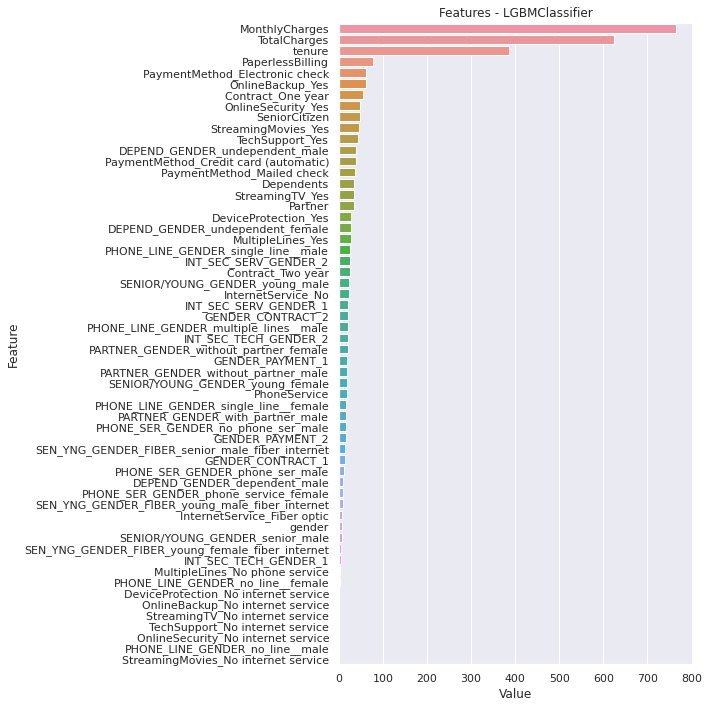

In [ ]:
def plot_importance(model, features,modelName, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
    plt.title('Features'+ ' - ' + modelName.__name__ )
    plt.tight_layout()
    plt.show()

for i in models[3:]:
    model=i().fit(X_train,y_train)
    plot_importance(model, X_train,i)

<a id='summary'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#99FFFF;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:9px 9px;">SUMMARY</p>  



<div style="border-radius:10px;
            border : black solid;
            background-color: #FFFFF;
            font-size:110%;
            text-align: left">
    


The work done is as follows:


* Imported Libraries and Read Diabetes Dataset
* Explorary Data Analysis : We checked the missing values and we defined a function to grab the categorical and numerical variables of its dataset. We made the target variable analysis and outliers analysis.
* Featured Engineering: We created new feature interactions for categorical variables.
* Encoding: One-Hot-Encoding was implemented for categorical variables.
* Modeling: We created ML model for the dataset. The accuracy score was calculated the machine learning models that are KNeighborsClassifier,SVC,MLPClassifier,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,XGBClassifier,LGBMClassifier.

   
    
**SVC and GradientBoosting Classifier** give the best scores according to the applied machine learning models.

Of course, this score can be further improved.

Thank you for your suggestions and comments :)